# Regresión lineal regularizada:  Bias vs Variance (Sesgo vs Varianza)

## Introducción

En este ejercicio usted va a implementar la regresión lineal con el propósito de estudiar
models con propiedades distintas de bias-variance.  Antes de comenzar el ejercicio de programación, le recomendamos ver los videos de clase-

Toda la informacion que se requiere para resolver esta tarea está en este cuaderno, y todo el código está contenido
acá.

Antes de comenzar con los ejercicios, necesitamos importar las librerías requeridas.
Vamos a usar [`numpy`](http://www.numpy.org/) para todos los arreglos y operaciones de matrices
[`matplotlib`](https://matplotlib.org/) para graficar y  [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
para las operaciones cientìficas.


In [80]:
# se usa para manipular caminos
import os

# vectores y matrices y mas
import numpy as np

# para graficar
from matplotlib import pyplot

# optimizacion con scipy
from scipy import optimize

# para cargar el archivo en MATLAB
from scipy.io import loadmat

# es parte del paquete para ayudar con funciones auxiliares
import utils


# graficas dentro de este cuaderno
%matplotlib inline

<a id="section1"></a>
## Regresión lineal regularizada

En la primera mitad del ejercicio usted implementará un regresión lineal regularizada, la cual predice la cantidad
de agua que fluye de una represa, mediante el cambio del nivel de agua en el reservorio. En la próxima mitad usted
examinará algunos diagnósticos y algoritmos de depuración para analizar el sesgo versus la varianza.


### 1.1 Visualización de datos

Comenzamos con la visualización de los datos que contienen los registros históricos del cambio de nivel de agua,
$x$, y la cantidad de agua que fluye fuera de la represa, $y$. Estos datos se dividen en 3 partes.

- Un conjunto de **entrenamiento** sobre el cual se aprende el modelo sobre: `X`, `y`
- Un conjunto de **validación cruzada** para determinar el paràmetro de regularización: `Xval`, `yval`
- Un conjunto de **prueba** para evaluar el desempeño. Estas son muestras "no vistas" durante el entrenamiento: `Xtest`, `ytest`

Corra la próxima celda para graficar los datos de entrenamiento. En las celdas siguientes usted debe implementar una regresión lineal para ajustar los datos a una línea recta y graficar las curvas. Luego usted debe implementar una regresión polinómica para encontrar un mejor ajuste a los datos.

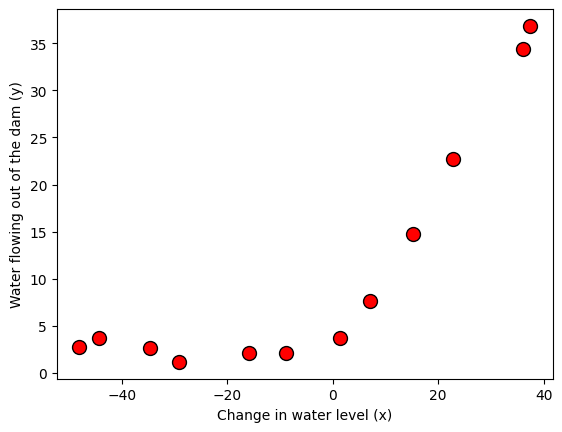

In [81]:
# Cargue los datos de ex5data.mat. Las variables estàn almacenadas en un diccionario
data = loadmat(os.path.join('Data', 'ex5data1.mat'))

# Extraiga los datos de entrenamiento, validación y prueba del diccionario
# luego convierta los yś de una matriz 2D (en formato MATLAB) a un vector en NumPY
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

# m = número de muestras
m = y.size

# grafique los datos de entrenamiento
pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)');

### 1.2 Función de costo de regresión lineal regularizada

Recuerde que la ecuaciòn de costo  de regresión lineal regularizada està dada por:


$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

donde $\lambda$ es el parámetro de regularización el cual controla el grado de regularización (este previene el
sobreajuste). El término de regularización agrega una función penalti a la función de costo $J$. A medida que las
magnitudes de los parámetors $\theta_j$ crecen la función de penalti incrementa. Note que no debemos regularizar
el parámetro $\theta_0$.

Por favor complete el código de la función `linearRegCostFunction` en la próxima celda. Si es posible trate de
vectorizar su codigo para evitar ciclos.

<a id="linearRegCostFunction"></a>

In [82]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    """
    Calcule la función de costo y su grardiente para la regresión
    lineal regularizada con variables múltiples. La función de
    costo usa el parámetro theta para ajustar los puntos X y y
    al modelo lineal.



    Parámetros
    ----------
    X : arreglo
        Los datos. Matriz con tamaño (m x n + 1) donde m es
        el número total de muestras y n es el número de atributos
        (features) antes de sumar el sesgo.


    y : arreglo
        Las etiquetas para cada punto de los datos. Es un
        vector de tamaño  (m, ).

    theta : arreglo
        Estos son los parámetros a aprender.
        Es un vector de tamaño (n+1,).

    lambda_ : float. Opcional
        Parámetro de regularización

    Returna
    -------
    J : float
        Función de costo

    grad : arreglo
        El valor del gradiente de la función de costo
        con respecto a theta.
        Un vector de tamaño (n+1, ).

    Instrucciones:
    ------------
    Calcule la función de costo y su gradiente para la regresión
    lineal regularizada y particularmente la sección de theta.
    Llame J a la función de costo y grad a su gradiente.


    """
    # Inicialice algunos valores útiles
    m = y.size # número de muestras de entrenamiento

    # debe retornar esto correctamente.
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== SU CÓDIGO ACÁ ======================
    h = X.dot(theta)

    reg = lambda_/(2*m)*np.sum(np.square(theta))
    J = 1/(2*m)*np.sum(np.square(h-y)) + reg

    grad = 1/m*np.dot((h-y),X)
    grad[1:] = grad[1:] + lambda_/m*theta[1:]

    # ============================================================
    return J, grad

Una vez termine prueba la siguiente celda con theta inicializado a  `[1, 1]`.
Debería obtener una salida de 303.993

In [83]:
theta = np.array([1, 1])
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   304.034859 
This value should be about 303.993192)



<a id="section2"></a>
### 1.3 Gradiente de regresión lineal regularizada

La derivada parcial de la función de costo regularizada para la regresión lineal está dado porÑ

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$

En la función  [`linearRegCostFunction`](#linearRegCostFunction) arriba adicione codigo para calcular el gradient, y
retorne  `grad`. <font color='red'><b>Recuerde que debe volver a ejecutar la celda junto con esta función.</b></font>

Una vez termine use la próxima celda para obtener el gradiente usando un theta inicializado en  `[1, 1]`.
Debería obtener un valor de  `[-15.30, 598.250]`.

In [84]:
theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



### Ajuste de regresión lineal

Una vez la función de costo y su gradiente están correctamente implementada, debe correr la siguiente celda
bajo el código en  `trainLinearReg` (la encuentra en el módulo `utils.py`) con el fin de calcular los valores
óptimos de $\theta$.  El entrenamiento usa un módulo de optimización de  `scipy`.

En esta parte asumimos el parámetro de regularización $\lambda$ igual 0. Dado que la implementación de la regresión
se hace sobre un conjunto 2-dimensional $\theta$, la regularización no es muy util para un $\theta$ de tan baja dimensiòn.
Màs tarde usted va a implementar una regresión polinomial con regularización.

Finalmente, el código en la siguiente celda debe graficar la línea que mejor se ajusta, la cual se debe ver
como la línea abajo.


![](Figures/linear_fit.png)

La linea que mejor se ajusta nos dice que el modelo no es bueno dado que los datos no tienen un patrón lineal.
Esta visualización es de gran ayuda para depurar el algoritmo de aprendizaje. No siempre es fácil visualizar
los datos y los modelos. En la próxima sección implementaremos una función que genera curvas de aprendizaje, las
cuales ayudan a depurar el algoritmo de apendizaje, aún si  los datos no son de fácil visualización.


/content/utils.py:43: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)


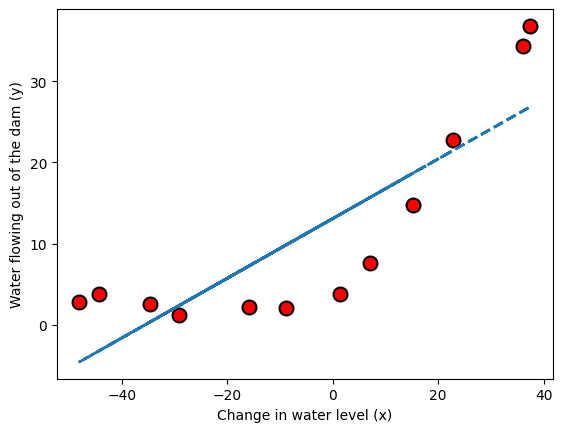

In [85]:
# agregar columna de unos para el intercepto
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = utils.trainLinearReg(linearRegCostFunction, X_aug, y, lambda_=0)

#  Grafique el ajuste sobre los datos
pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.plot(X, np.dot(X_aug, theta), '--', lw=2);

<a id="section3"></a>
## 2 Bias vs variance
Un concepto importante en machine learning es el compromiso entre sesgo y varianza (bias-variance tradeoff).
Los modelos con un sesgo grande no presentan suficiente complejidad para los datos dados y hay tendencia al
subajuste (underfit), mientras que los modelos con varianza alta sobreajustan (overfit) los datos de entrenamiento.

In esta parte usted debe graficar curvas de errores de entrenamiento y prueba para diagnosticar problemas de
sesgo versus varianza.


### 2.1 Curvas de aprendizaje (learning curves)
Usted implementará un código para generar curvas de aprendizaje, las cuales serán útiles en la depuración del algoritmo.
Recuerde que las curvas de aprendizaje durante entrenamiento y valización cruzada (cross validation) como función
del tamaño de los datos de entrenamiento. Usted debe completar el código en la functión `learningCurve` en la siguiente
celda, de forma que retorne un vector con los errores para los datos de entrenamiento y validación cruzada.

Para graficar la curva de entrenamiento necesitamos datos de entrenamiento y validación cruzada para tamaños de
datos diferentes. Para obtener datos de entrenamiento diferentes  usted debe elegir subconjuntos distintos del
conjunto original de entrenamiento `X`. Especificamente, para un conjunto de entrenamiento de tamaño $i$, usted
debe usar primero $i$ muestras ( es decir,  `X[:i, :]` y  `y[:i]`).


Puede usar la función `trainLinearReg` (mediante el llamado a  `utils.trainLinearReg(...)`) paraa encontrar los
parámetros $\theta$. Note que  `lambda_` se pasa como parámetro de la función `learningCurve` .
Luego del aprendizaje de los parámetros $\theta$ usted debe calcular el error en los conjuntos de entrenamiento
y cross validación. Recuerede que el error de entrenamiento para el conjunto se define como


$$ J_{\text{train}} = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$

En particular, que el entrenamiento no incluye el término de regularización. Una forma de calcular el error de entrenamiento
es mediante el uso de la función de costo haciendo $\lambda=0$ solo en el cálculo del error de entrenamiento y validación
cruzada. Cuando se calcula el error de entrenamiento se usa el subconjunto de entrenamiento ( es decir,  `X[:n,:]` y `y[:n]`)
en vez de todo el conjunto de entrenamiento. Sin embargo, para el error de validación cruzadad lo debe hacer sobre
todo el conjunto de validación cruzadad. Debes almacenar los errores en los vectores de errores de entrenamiento y validación.



<a id="func2"></a>

In [86]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    """
    Genera los errores de entrenamiento y validación cruzada, los cuales son
    usados para graficar la curva de aprendizaje. Retorna los errores de
    entrenamiento y validación cruzadad para la curva de aprendizaje.

    En esta función usted estima los errores de entrenamiento y prueba
    para datos de tamaños desde 1 hasta m. En la práctica, cuando se trabaja
    con datos más grandes, usted lo puede lograr con intervalos mayores.


    Paràmetros
    ----------
    X : arreglo
        Los datos de entrenamiento. Una matriz de tamaño (m x n + 1) donde
        m es el númereo total de muestras y n es el número de atributos antes
        de agregar el término de sesgo (bias).


    y : arreglo
        Etiquetas para cada dato de entrada. Es un vector de tamaño (m, ).


    Xval : arreglo
        El conjunto para validación cruzada. Una matriz de tamaño (m_val x n+1=
        donde m es el número total de muestras y n es el número de atributos antes
        de agregar el sesgo.

    yval : arreglo
        Las etiquetas correspondientes a los puntos de validación cruzada.
        Un vector de tamaño (m_val, ).

    lambda_ : float, opcional
        Parámetro de regularización

    Returna
    -------
    error_trai : arreglo
        Un vector de tamaño m.  error_train[i] contiene el error de entrenamiento
        de la muestra i.

    error_val : arreglo
        Un vector de tamaño m_val. error_val[i]  contiene el error de la validación
        para la muestra i


    Instrucciones:
    ------------

    Llene la función, la cual debe retornar los errores de entrenamiento
    en error_train y los errores de validación cruzada en error_val.  Es
    decir error_train[i] y error_val[i] deberían arrojar los errores obtenidos
    en la muestra i.




    Notas:
    -----
     - Inicialmente evalua el vector training_error en las primeras i
      muestras. Es decir X[:i, :] y y[:i].

      - Para la validación cruzada usted deve evaluar todo
      el conjunto correspondiente a la validación cruzada (Xval y yval)

     - Si está usando la función de costo (linearRegCostFunction) para calcular
       el error de entrenamiento y validación cruzada, debe llamar la función con
       lambda=0. Sin embargo usted todavia necesita usar lambda durante entrenamiento
       para obtener los parámetros theta.



    Ayuda
    ----
    Usted puede iterar sobre las muetras con el siguiente código:

           for i in range(1, m+1):
               # Calcule errores de entrenar/validar errors usando muestras de entrenamiento
               # X[:i, :] and y[:i], almacenar en
               # error_train[i-1] and error_val[i-1]
               ....
    """
    # Número de muestras de entrenamiento
    m = y.size

    # necesita retornar estos correctamento
    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    # ====================== SU CÓDIGO ACÁ ======================

    for i in range(1, m+1):

        theta = utils.trainLinearReg(linearRegCostFunction,X[:i, :],y[:i],lambda_)

        error_train[i-1], a = linearRegCostFunction(X[:i],y[:i],theta,lambda_)
        error_val[i-1], b = linearRegCostFunction(Xval,yval,theta,lambda_)


    # =============================================================
    return error_train, error_val

Cuando termine la implementación de la función  `learningCurve`, la próxima celda debe producir la figura

![](Figures/learning_curve.png)

En la figura de aprendizaje usted puede observar el error de entrenamiento  incrementando
con el número de muestras. Esto refleja un sesgo alto en el modelo  ' la regresion lineal es demasiado simple y no
puede ajustarse a los datos bien. En la próxima sección usted implementará la regresión polinomial para mejor
ajustar el modelo a los datos.

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


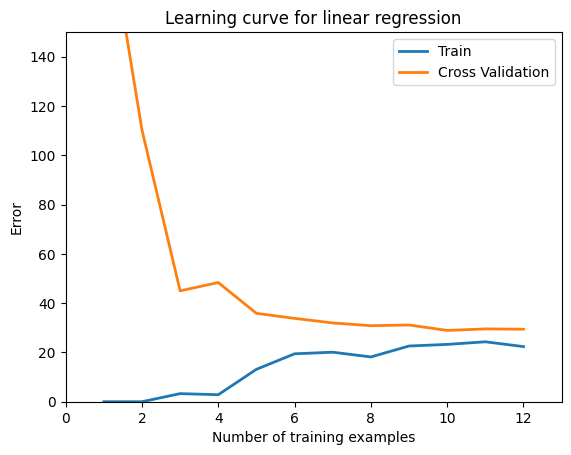

In [87]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

<a id="section4"></a>

## 3 Regresión polinomial

El  problema con la regresión lineal es que es muy simple para los datos y el resultado
subestima (sesgo alto) la soluciòn,  En esta parte agregamos mas atributos. Para la regresión polinòmica la hipòtesis toma la forma

$$
\begin{align}
h_\theta(x)  &= \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \cdots + \theta_p \times (\text{waterLevel})^p \\
& = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p
\end{align}
$$


Note que por definición $x_1 = (\text{waterLevel})$, $x_2 = (\text{waterLevel})^2$ , $\cdots$, $x_p =
(\text{waterLevel})^p$, encontramos un modelo de regresión lineal donde los atributos son potencias del valor inicial (waterLevel).

Ahora usted debe agregar mas atributos correspondientes a potencias del atributo $x$ en los datos. Su tarea en esta parte es completar el código en la función
 `polyFeatures` en la siguiente celda. La función debe mapear el conjunto original de datos $X$ de tamaño $m \times l$ a potencias superiores. Especificamente,
cuando un conjunto de datos de entrenamiento $X$ de tamaño $m \times l$ se pasa a una funciòn, la función debería retornar una matriz $m \times p$
 `X_poly`, donde la columna 1 contiene los valores originales de X, la columna 2 contiene los valores $X^2$, la columna 3 los valores $X^3$, etc.



<a id="polyFeatures"></a>

In [100]:
def polyFeatures(X, p):
    """
    Mape X (vector) a la potencia p

    Paràmetros
    ----------
    X : arreglo
        un vector de tamaño m, donde  m es el nùmero de muestras.

    p : int
        potencia del polinomio.

    Retorna
    -------
    X_poly : arreglo
        Una matriz de tamaño (m x p ) donde p es un polinomio
        la potencia m es el nùmero de muestras. Es decir,

        X_poly[i, :] = [X[i], X[i]**2, X[i]**3 ...  X[i]**p]

    Instrucciones
    ------------
    Dado un vector X, retorna una matriz X_poly donde la columna p
    de X contiene los valores de X a la potencia p.

    """
    # Necesita retornar los siguientes valores correctamente
    X_poly = np.zeros((X.shape[0], p))

    # ====================== SU CÓDIGO ACÁ ======================
    for i in range(p):
        X_poly[ :, i ] = X[:,0]**(i+1)


    # ============================================================
    return X_poly

Ahora usted tiene una funciòn que mapea atributos a una dimensiòn superior. La próxima celda se aplica a los datos de entrenamiento, validación y prueba.

In [101]:
p = 8

# Mapea X a atributos polinomiales y normaliza
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = utils.featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Mapea X_poly_test y normaliza suando mu y sigma
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Mapea X_poly_val y normaliza (usando mu y sigma=
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

## 3.1 Aprendizaje de rergresión polinomial

Luego de completar la función  `polyFeatures`, procedemos a entrenar la regresiòn polinomial usando la función de costo de la regresiòn lineal.

Tenga en cuenta que aunque tengamos términos polinomiales en nuesto vector de atributos, el problema que estamos resolviendo es aún lineal en $\theta$.
Los tèrminos polinomiales se convierten en atributos que se pueden usar para regresiòn lineal. Usamos la misma funciòn de costo y gradiente que usted escribiò
arriba.

Para esta parte del ejercicio, usted usará un polinomio de grado 8. Si corremos el entrenamiento directamente en los datos proyectados, podríamos tener
problemas debido a escalas (por ejemplo, si $x=40$ entones $x_8 = 40^8=6.5 \times 10^{12}$. Por esta razòn necesitamos normalizaciòn.


Antes de aprender los paràmetros $\theta$ para la regresiòn polinòmica primeros llamamos `featureNormalize` y normalizamos los atributos, almacenando
$\mu$, $\sigma$. Esta función ya está implementada en `utils.py`.


Luego de aprender el paràmetro $\theta$ useted debe ver los dos gráficos generados para regresión polinómica con $\lambda=0$, que deben ser parecidas
a las mostradas acá.

<table>
    <tr>
        <td><img src="Figures/polynomial_regression.png"></td>
        <td><img src="Figures/polynomial_learning_curve.png"></td>
    </tr>
</table>

Se puede observar que el ajuste polinomial sigue los puntos muy bien, lo cual produce un error de entrenamiento bajo. La figura en la derecha
muestra que el error de aprendizaje esencialmente es 0 para todas las muestras de entrenamiento. Sin embargo, el ajuste polinomial es muy
complicado y presenta problemas en los extremos. Esto es un indicador de sobreajuste en los datos de entrenamiento. Es decir el modelo
no generaliza bien.


Para entender mejor los problemas con el modelo no regularizado ($\lambda=0$) usted puede ver que la curva de aprendizaje muestra el mismo efecto
con error de entrenamiento bajo, sin embargo el error de validaciòn cruzada es alto. Hay una brecha entre los errors entrenamiento y los de validación cruzada,
lo cual indica una varianza alta en el problema.

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121511
  	3		0.000000	59.071635
  	4		0.000000	77.998006
  	5		0.000000	6.448210
  	6		0.000000	10.827583
  	7		0.000000	27.915831
  	8		0.000000	21.489777
  	9		0.068079	11.546164
  	10		0.043608	18.020606
  	11		0.036556	27.369230
  	12		0.034384	30.237373


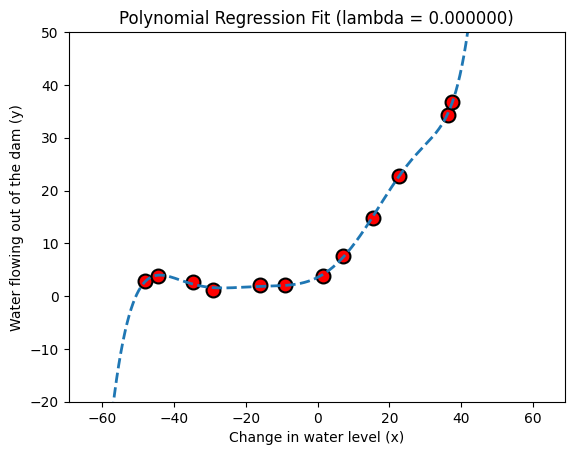

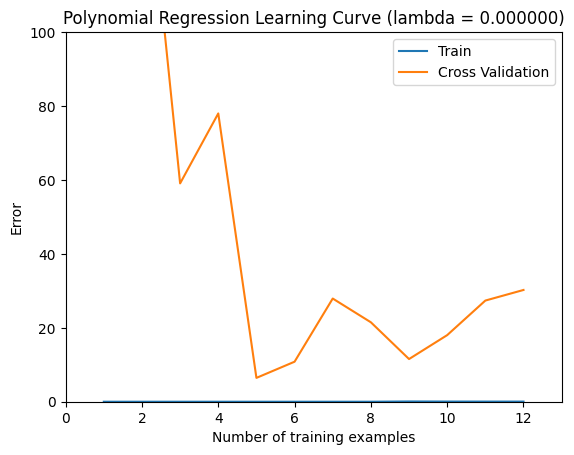

In [103]:
lambda_ = 0
theta = utils.trainLinearReg(linearRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# grafique los datos y ajuste
pyplot.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

utils.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
pyplot.ylim([-20, 50])

pyplot.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 100])
pyplot.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

Una forma de combatir el sobreajuste (varianza alta) es mediante regularización. En la próxima sección, usted va a tratar paràmetros diferentes
de $\lambda$ para ver como la regularizaciòn produce un mejor modelo.


### 3.2 Ajuste del parámetro de regularización.

En esta sección usted verà como el parámetro de regularización afecta la relación de sesgo-varianza de la regresión polinomial. Usted debe modificar
el parámetro y tratar $\lambda = 1, 100$. Para cada uno de estos valores, el programa debe generar un ajuste del polinomio a los datos y asi una curva
de aprendizaje.

Para $\lambda = 1$, los gráficos se deben ver como la figura abajo. Usted debería ver un ajuste polinomial que sigue los datos bien (izquierda) y una
curva de aprendizaje (derecha) que muestra que tanto el error de entrenamientco como el de validación cruzada convergen a un valor bajo. Esto muestra
que  $\lambda = 1$ proporciona un modelo que no tiene, ni sesgo, ni varianza altos. En efecto, este muestra una buena relaciòn costo beneficio entre
sesgo y varianza.

<table>
    <tr>
        <td><img src="Figures/polynomial_regression_reg_1.png"></td>
        <td><img src="Figures/polynomial_learning_curve_reg_1.png"></td>
    </tr>
</table>

Para $\lambda=100$ (figura abajo) vemos que la curva no sigue de cerca los puntos. En este caso, la regularizaciòn es muy alta y el modelo tiene un sesgo
alto. No puede seguir bien los datos.


![](Figures/polynomial_regression_reg_100.png)

<a id="section5"></a>
### 3.3 Selección de  $\lambda$ mediante un conjunto de validaciòn cruzada

De las partes anteriores de este ejercicio usted ha observado que el valor de $\lambda$ puede afectar significativamente los resultados de regresión polinomial
regularizada en el contexto del compromiso de  sesgo vs varianza. En particular, un modelo sin regularización $(\lambda=0)$ produce un buen ajuste
de los datos de entrenamiento a la curva. Sin embargo este modelo no generaliza bien a datos por fuera de los datos de entrenamiento. En el otro polo,
una regularización con ($\lambda=100$) no produce un buen ajuste entre los datos y el modelo. Una buena selección de $\lambda$ es $\lambda=1$. Esta
provee un buen ajuste entre los datos y el modelo.

En esta sección usted debe implementar un método automático para seleccionar $\lambda$. Concretamente, usted va a usasr validación cruzada para evaluar
que tam bien $\lambda$ ajusta los datos al modelo. Luego de seleccionar el mejor $\lambda$ usando el conjunto de validación cruzada, podemos evaluar el modelo
en datos de prueba para estimar que tan bien el modelo generaliza a datos externos al entrenamiento.

Su tarea es completar el código en la función `validationCurve`. Especìficamente usted debe usar la función  `utils.trainLinearReg` para entrenar el model
usando diferentes valores de $\lambda$ y la evaluación en datos de entrenamientos y validación. Usted debe probar los siguientes $\lambda$ : {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.
<a id="validationCurve"></a>

In [112]:
def validationCurve(X, y, Xval, yval):
    """
    Generar los errores de entrenamiento y validación necesarios
    para graficar las curvas de validación que usamos para seleccionar lambda.

    Parámetros
    ----------
    X : arreglo
        Los datos de entrenamiento. Matriz con tamaño (m x n ) donde
        m es el nùmero total de muestas y n es el nùmero de atributos
        incluyendo atributos polinomiales.



    y : arreglo
        Las etiquetas correspondientes a los datos. Un vector
        de tamaño (m, )

    Xval : arreglo
        Los dadtos de validaciòn. Una matriz de tamaño (n_val x n) donde
        m es el número total de muestras de validación y n es sel número
        de atributos incluyendo atributos polinomiales.


    yval : arreglo
        Las etiquetas correspondientes a los datos de validadación.
        El tamaño es (m_val, )



    Retorno
    -------
    lambda_vec : lista
        Los valores de regularización que se usan en la validación
        cruzada.


    error_train : lista
        El error de entrenamiento paara cadad valor del parámetro
        de regularización.

    error_val : lista
        El error de validación calculado para cada parámetro
        de regularización.

    Instrucciones:
    ------------
    Complete esta función para que retorne los errores de entrenamiento y
    validación en `error_train y `error_val`. El vector `lambda_vec`
    contiene diferentes parámetros de laambdad para usar en cada cálculo
    de errores. Es decir, `error_train[i]`, y `error_val[i]` deben
    producir los errores luego del entrenamiento con `lambda_ = lambda_vec[i]`.



    Nota
    ----
    Usted debe buscar, en un ciclo,   lambda_vec con lo siguiente

          for i in range(len(lambda_vec))
              lambda = lambda_vec[i]
              # calcule erroes de entrenamiento y validaciòn
              # regresion con parámetro de regularización lambda.
              # Debe guardar el resultado en error_train[i]
              # y error_val[i]
              ....
    """
    # Valores seleccionados de lambda. No cambie esto.
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    # ====================== SU CÓDIGO ACÁ ======================

    for i in range(len(lambda_vec)):

        theta = utils.trainLinearReg(linearRegCostFunction,X,y,lambda_vec[i] )
        error_train[i], _ = linearRegCostFunction(X,y,theta,0)
        error_val[i], _ = linearRegCostFunction(Xval,yval,theta,0)

    # ============================================================
    return lambda_vec, error_train, error_val

Luego de completar el código, la siguiente celda corre la función y grafica la curva de error de validación cruzada contra $\lambda$. Esto
nos permite seleccionar cual $\lambda$ debe usar. Usted debería tener una gráfica similar a la que sigue abajo.

![](Figures/cross_validation.png)

En esta figura podemos observar que el mejor valor de $\lambda$ esta al rededor de 3. Debido a la aletoriedad
en la partición de entrenamiento y validación el error de validación cruzada puede ser algunas veces más bajo
que el de entrenamiento.


/content/utils.py:43: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)


lambda		Train Error	Validation Error
 0.000000	0.034384	30.237373
 0.001000	0.113338	9.884231
 0.003000	0.170626	16.454670
 0.010000	0.220979	16.990679
 0.030000	0.282133	12.811960
 0.100000	0.458647	7.564713
 0.300000	0.925989	4.630122
 1.000000	2.077283	4.290337
 3.000000	4.992458	4.140186
 10.000000	28.587342	24.671800


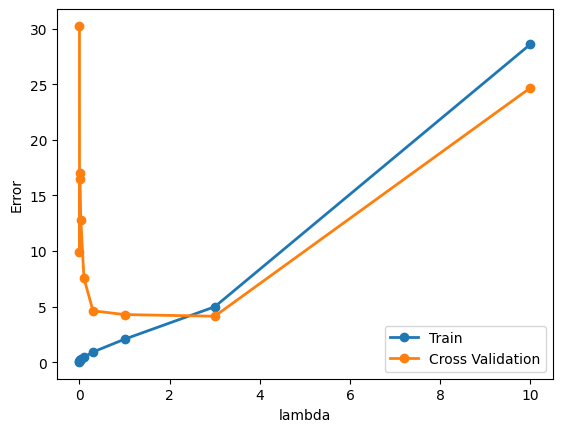

In [113]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))